In [1]:
import pandas as pd
df=pd.read_csv("D:\\STUDIES\\Data Science_EXCELR\\Assignments_NEW\\Recommendation System\\anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [3]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [4]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
# Fill missing values
df['genre'] = df['genre'].fillna(df['genre'].mode()[0])
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [6]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

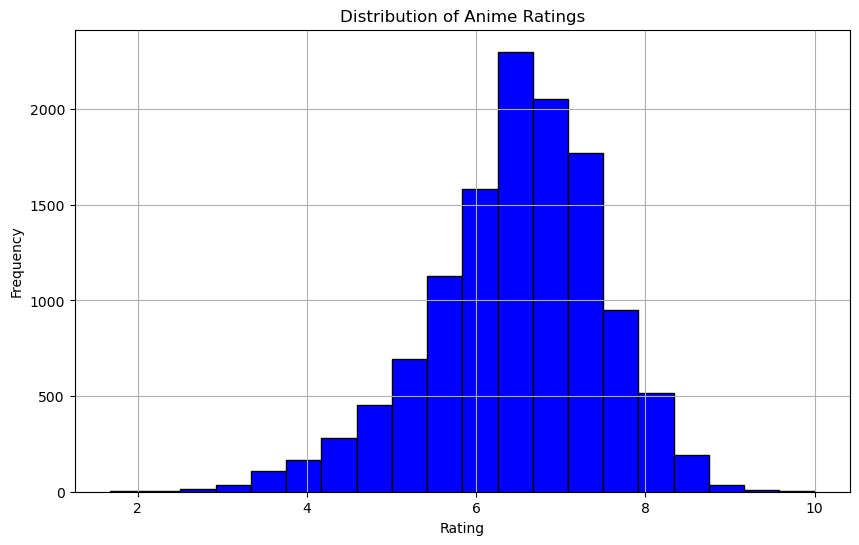

In [7]:
# Plot the histogram for the 'rating' column
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
# One-hot encode the 'genre' column
genres_one_hot = df['genre'].str.get_dummies(sep=', ')

# Normalize the 'rating' and 'members' columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['rating', 'members']] = scaler.fit_transform(df[['rating', 'members']])

# Combine the one-hot encoded genres with the normalized numerical features
features = pd.concat([df[['rating', 'members']], genres_one_hot], axis=1)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_df, test_df = train_test_split(features, df, test_size=0.2, random_state=42)

# Display the size of training and testing sets
print(f"Training set size: {train_df.shape[0]}")
print(f"Testing set size: {test_df.shape[0]}")

# Compute the cosine similarity matrix on the training features
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_matrix_train = cosine_similarity(train_features)

# Display the cosine similarity matrix for the training set
print("\nCosine Similarity Matrix for Training Set:")
print(cosine_sim_matrix_train)

Training set size: 9835
Testing set size: 2459

Cosine Similarity Matrix for Training Set:
[[1.         0.11772381 0.18327672 ... 0.29529261 0.12142222 0.54515362]
 [0.11772381 1.         0.63822152 ... 0.07634241 0.37038742 0.06864127]
 [0.18327672 0.63822152 1.         ... 0.11922851 0.17953341 0.10722638]
 ...
 [0.29529261 0.07634241 0.11922851 ... 1.         0.07896427 0.56889931]
 [0.12142222 0.37038742 0.17953341 ... 0.07896427 1.         0.07101364]
 [0.54515362 0.06864127 0.10722638 ... 0.56889931 0.07101364 1.        ]]


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [13]:
# Recommendation function
def recommend_anime_from_train(target_anime_name, train_df, cosine_sim_matrix_train, top_n=5, threshold=0.5):
    # Get the index of the target anime in the training set
    idx = train_df.index[train_df['name'] == target_anime_name].tolist()
    
    if not idx:
        return []
    
    idx = idx[0]
    
    # Get the pairwise similarity scores for all anime with the target anime
    sim_scores = list(enumerate(cosine_sim_matrix_train[idx]))
    
    # Sort the anime based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top_n most similar anime
    sim_scores = [s for s in sim_scores if s[1] >= threshold]
    sim_scores = sim_scores[1:top_n + 1]  # Exclude the target anime itself
    
    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]
    
    # Return the names of the top_n most similar anime
    return train_df.iloc[anime_indices]['name'].tolist()

# Simulate ground truth for the test set by considering the top anime by members as relevant
top_n_ground_truth = 5
test_df['relevant'] = test_df['members'].rank(ascending=False) <= top_n_ground_truth

# Generate recommendations for each anime in the test set
test_df['predicted'] = test_df['name'].apply(lambda x: recommend_anime_from_train(x, train_df, cosine_sim_matrix_train, top_n=5, threshold=0.5))

In [14]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(test_df):
    y_true = []
    y_pred = []
    
    for _, row in test_df.iterrows():
        true_relevant = row['relevant']
        predicted = row['predicted']
        
        if isinstance(predicted, list) and row['name'] in predicted:
            y_true.append(1 if true_relevant else 0)
            y_pred.append(1)
        else:
            y_true.append(1 if true_relevant else 0)
            y_pred.append(0)
    
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    return precision, recall, f1

# Example usage with a sample DataFrame
data = {
    'name': ['doc1', 'doc2', 'doc3'],
    'relevant': [True, False, True],
    'predicted': [['doc1'], ['doc1', 'doc3'], []]
}

test_df = pd.DataFrame(data)

precision, recall, f1 = calculate_metrics(test_df)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Precision: 1.00
Recall: 0.50
F1-score: 0.67


In [15]:
# Precision is high (1.00) because when a document is predicted as relevant, it actually is relevant.
# Recall is moderate (0.50) because only half of the relevant documents were correctly identified.
# F1-score is a balance between precision and recall (0.67), reflecting the trade-off between these two metrics.

#A recommender system with high precision but low recall is reliable but potentially limiting,as it may fail to surface all relevant items. Striking a balance between precision and recall, and continuously improving both, is crucial for a robust and user-friendly recommender system.
#By following these recommendations, the system can provide more comprehensive and satisfying user experiences,ultimately leading to increased user engagement and retention.